# Analisis Exploratorio de Datos

## 1.- Introducción muuuuy rapida a Data Frames

Puedes pensar en un **dataframe** como una variablesota donde puedes guardar tablas enteras (en vez de números o palabras sencillos).

Los dataframes no son nativos de Python, vienen de una libreria llamada **Pandas**

Lo primero que se necesita para trabajar con susodichos dataframes es... importar Pandas

In [9]:
import pandas as pd


Ok, ahora vamos a crear un Dataframe que almacene todos los datos que vienen en nuestro archivo de Excel CSV

In [10]:
df_train = pd.read_csv("train.csv")

Veamos como se importo nuestra base de datos a df

Ok, veamos códigos útiles para analizar Dataframes. El primer método es **head**

In [11]:
df_train.head(5) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Ahora conozcamos **shape**

In [12]:
df_train.shape

(1460, 81)

Que al si quieremos ver una columna en especifico? ponemos el nombre de la columna entre corchetes

In [13]:
df_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Ok, ahora vamos viendo 2 columnas a la vez

In [14]:
df_train[["SalePrice", "LotArea"]]

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


Por último, vamos pégandole a la estádistica descriptiva. El método **mean** te da los promedios que quieres saber del DF

In [15]:
df_train.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN  

Y el método **Describe** te da un resumen de todo en el Dataframe

In [16]:
df_train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

## 2.- Primeros pasos - traer todo lo importante

Importa todas las librerías que vas a necesitar

- pandas como pd
- matplotlib.pyplot como plt
- seaborn como sns
- numpy como np
- scipy.stats traer norm
- sklearn.preprocessing traer standardscaler
- scipy traer stats
- warnings

y %matplotlib inline

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

Importa el csv de train.csv para poder tener los datos

La idea es identificar cuales columnas creemos que van a tener el mayor impacto sobre el precio de la vivienda. 

Al final veremos que las columnas con mayor impacto son:

Variables de Construcción
- CalidadTotal
- AñoConstruccion

Variables de Espacio
- AreaSotano
- AreaVivienda

## 3.- Analisis de Precio de Ventas

Lo primero es conocer a "PrecioVenta". Vamos viendo su **describe**

In [20]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Ahora vamos pidiendole una foto - hagamos una gráfica de **distplot**

Veremos que
- Se desvía de la distribucion normal
- Tiene Skew positivo (oblicuidad)
- Muestra Peakedness (kurtosis??)

c:\Users\garyf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


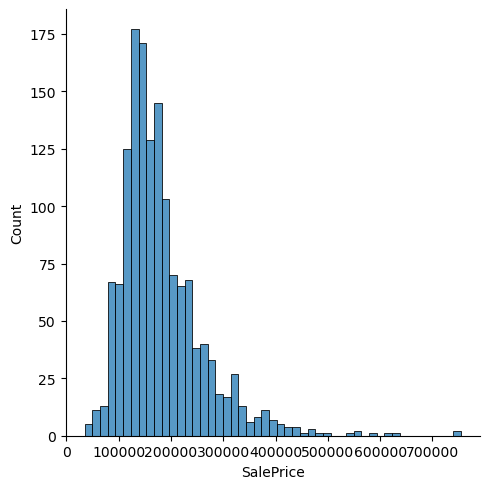

In [21]:
sns.displot(df_train["SalePrice"])

Podemos conocer el skewness y la kurtosis de la gráfica usando los métodos **skew** y **kurt**

In [22]:
df_train["SalePrice"].skew()

1.8828757597682129

In [23]:
df_train["SalePrice"].kurt()

6.536281860064529

Vamos viendo que sucede con las amigas de "PrecioVenta" - dibujemos un ScatterPlot de PrecioVenta vs AreaVivienda. Nota como vamos a reducir el dataframe a solo 2 columnas para no tener que usar todo

Primero declara una variable var que contenga el area vivible

In [24]:
Av = "GrLivArea"

Luego vamos a usar pd.concat para crear una tabla de solo 2 columnas con area vivible (var) y Precio de venta que se llame data

In [25]:
data = pd.concat([df_train["SalePrice"],df_train[Av]], axis=1)

In [26]:
data.head(5)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


y ahora vamos a terminar con un data.plot.scatter para crear una grafica de scatterplot. 

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

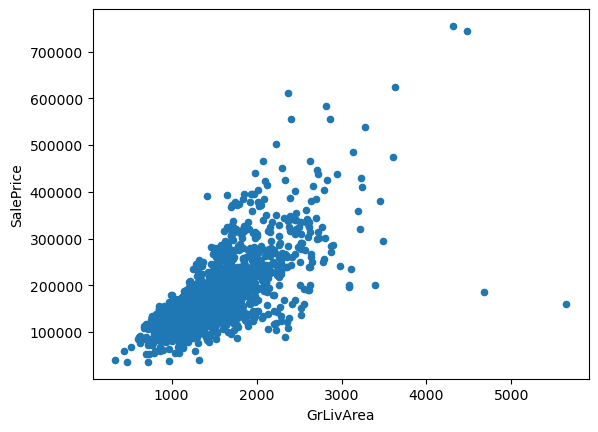

In [31]:
data.plot.scatter(x=Av, y="SalePrice", ylim=(0.800000))

a mayor area habitable mayor es el preccio de venta 

Ahora que pasa con "PrecioVenta" y "AreaSotano"? Son amigas pero su relación no es lineal. Sin mencionar que a veces, el AreaSotano se va en su onda y evita el PrecioVenta

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

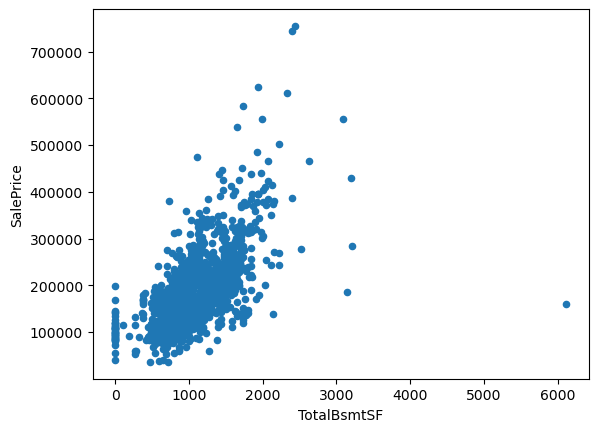

In [35]:
As = "TotalBsmtSF"
data = pd.concat([df_train["SalePrice"], df_train[As]], axis=1)
data.plot.scatter(x=As, y="SalePrice", ylim=(0.800000))

la relacion entre el tamño del sotano y el precio no es tan iportante como el area vivible, aunque podemos ver que a mayor area del sotano si aumentan los precios .

#### Relaciones categóricas

Vamos ahor a armar una gráfica de boxplot para verificar el efecto de la Calidad sobre el precio de ventas. 

Comenzamos igual, declara una variable var = "CalidadTotal"

Y una data donde concatenes el precio de ventas con var

In [36]:
CT = "OverallQual"  

In [37]:
data = pd.concat([df_train["SalePrice"], df_train[CT]], axis=1)

In [38]:
data.head(5)

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


Ahora viene lo dificl, en dos variables f y ax, vas a guardar el resultado de un plt.subplots - donde se define la nueva figura donde existirá la gráfica que se va a crear. F y ax es la figura y los ejes que devuelve la instruccion

(-0.5, 9.5, 0.0, 800000.0)

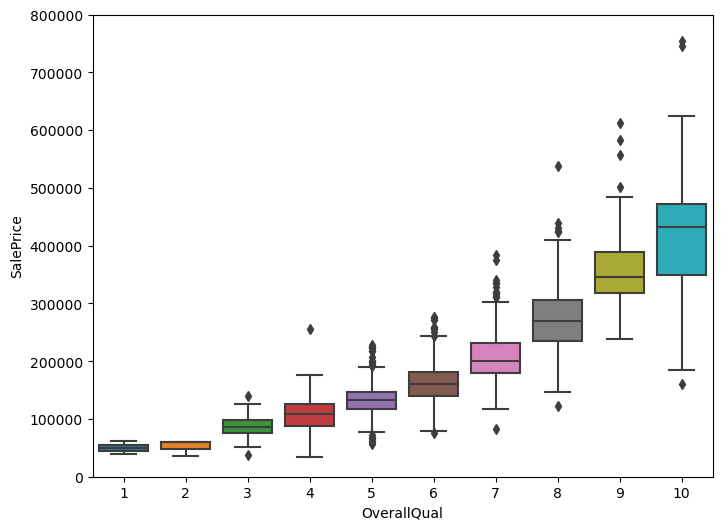

In [42]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=CT, y ="SalePrice", data = data)
fig.axis(ymin=0, ymax= 800000) 

 a mayor calidad , mayor es el precio de las casas. tambien podemos ver que en la misma escala de calidad varia el precio de la casa es decir que las casas con calidad 10 no cuestan lo mismo sino que hay diferencia significativa entre las casas 

por ultimo, definimos fig como una variable donde haremos un sns.boxplot (para guardar la grafica)

y definiremos el eje fig.axis de 0 a 8000000

Hagamos lo exacto mismo pero con Precio de Venta vs Año Construida

In [43]:
Av = "YearBuilt"

In [44]:
data = pd.concat([df_train["SalePrice"],df_train[Av]], axis=1)

In [45]:
data.head(5)

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

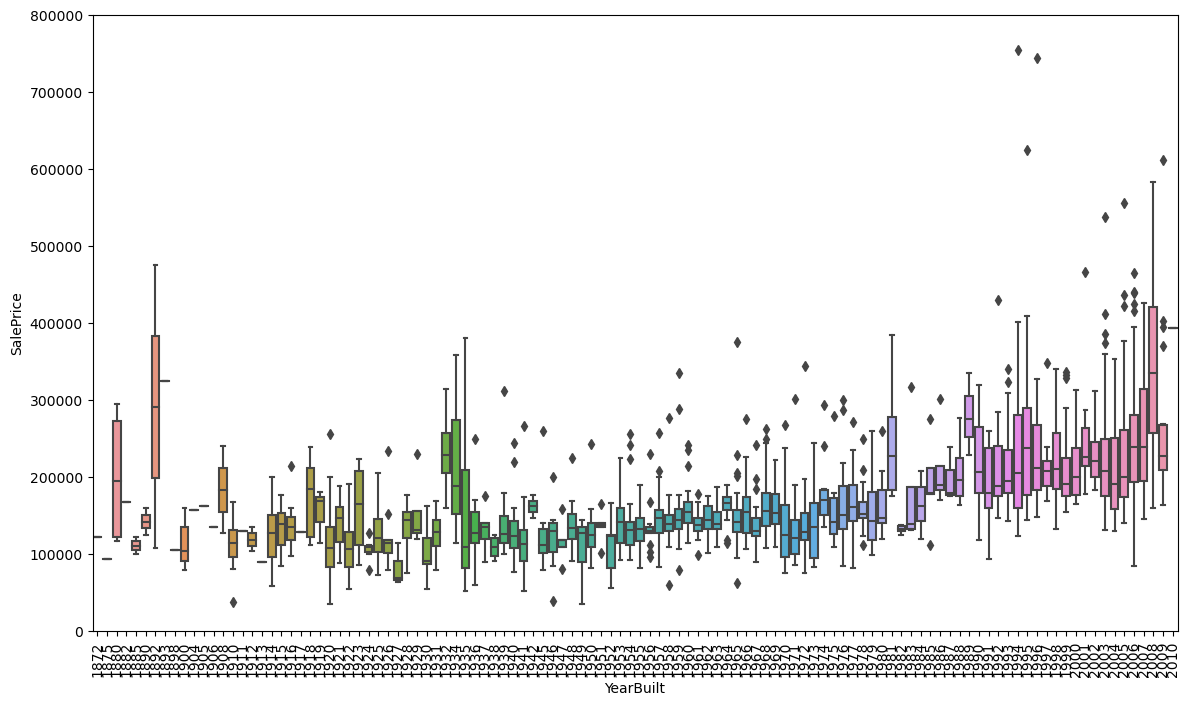

In [54]:
f, ax = plt.subplots(figsize=(14,8))
Gra = sns.boxplot(x=Av, y= "SalePrice", data=data)
Gra.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90) 
 

podemos ver que las casas mas modernas tienden a costar mas ,pero no es definitivo en el costo de las casas ya que tenemos casas con mas antiguedad en su año de construccion copn precios muy similares a las casas mas modernas 

#### En resumen

¿Que es lo que observas de las variables númericas?

el precio de venta se relaciona muchisimo con el area vivible y de igual manera pero en mayor proporcion el area de sotano y el precio de venta se relacionan 

¿Que es lo que observas de las variables catégoricas

la relacion se nota mucho mayor cuando observamos la calidad de las casas vs el año de construccion , es decir las casas tienen mayor valor monetario por la calidad que por el año de construccion 

## 4.- Confirmando nuestra intuición

Hasta ahora decidimos a puro pulso que estas 4 eran las variables importantes, vamos confirmando con números si es verdad o no

### 4.1.- Matriz de Correlación

Lo primero es armar una matriz de correlación (mapa de calor) para ver cuales son las variables más correlacionadas

Vamos declarando una variable corrmat = df_train.corr() con todas las correlaciones entre variables

In [65]:
numeric_cols = df_train.select_dtypes(include=['float64', 'int64'])
categorical_cols = df_train.select_dtypes(include=['object'])
encoded_categorical_cols = pd.get_dummies(categorical_cols)
combined_df = pd.concat([numeric_cols, encoded_categorical_cols], axis=1)
corrmat = combined_df.corr()                                          
                                          

Luego unas f,ax para declarar un plt.subplots

<Axes: >

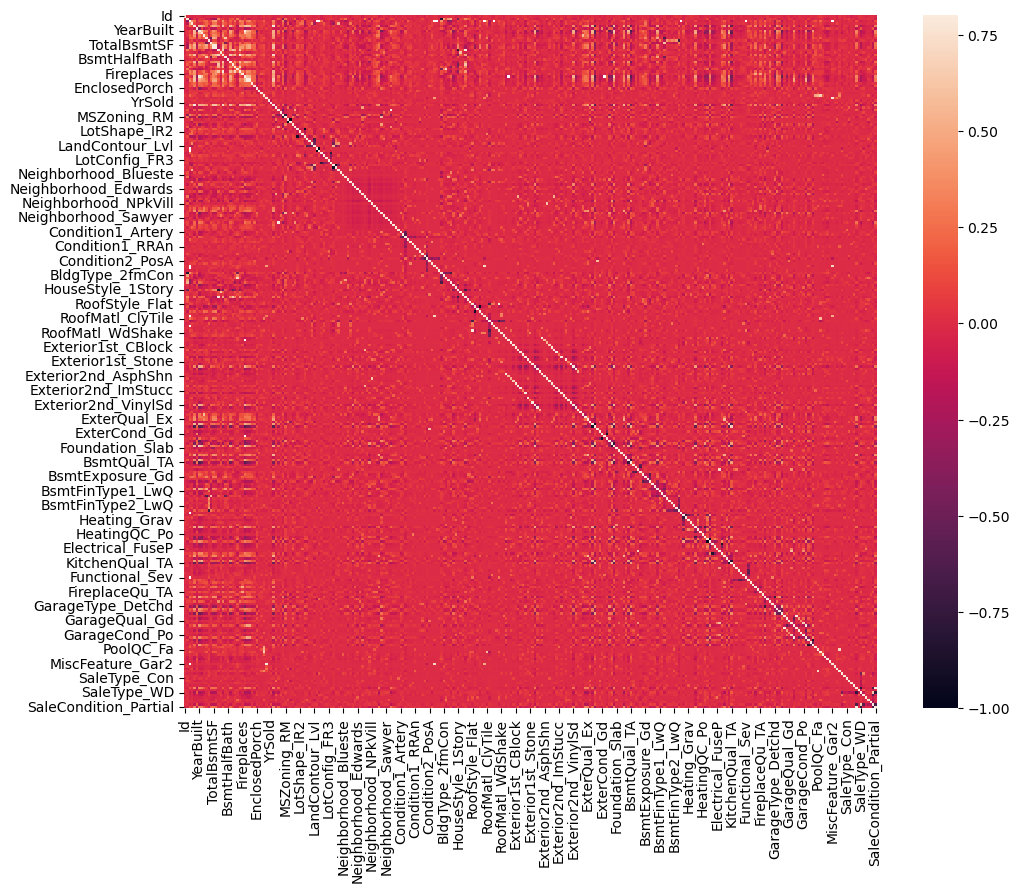

In [67]:
f,ax =plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Y finalmente hacemos el sns.heatmap

### 4.2.- Matriz de Correlación con Números

Ok, vamos haciendo lo mismo pero ahora con números - y vamos viendo quien se correlaciona más - sin llegar al punto que las 2 variables sean basicamente lo mismo claro

Comenzamos declarando k=10

Luego cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].inde

A continuación vamos a cm = np.corrcoef(df_train[cols].values.T)

Seguimos con sns.set(font_scale=1.25)

Armarmos el heatmap con hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

Podemos ver que:
- Calidad, AreaVivienda y area Sotano estan muy fuertemente correlacionadas con PrecioVenta
- Las variables de garage están super correlacionadas
- Sotano y 1er piso son basicamente hermanos gemelos
- Y AñoConstruccion esta ligeramente correlacionada con PrecioVenta, parece que en un futuro habra que hacer un analisis de serie de tiempo más serio.

### 4.3.- Scatter Plots entre Sale Price y variables Correlacionados

Por utlimo, hagamos scatterplots usando seabron de todas las posibles relaciones que podríamos tener en nuestro dataset - entre las variables que nos importan claro.

Comenzamos declarando sns.set()

In [4]:
sns.set()

Luego cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [6]:
 cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

Seguimos con sns.pairplot(df_train)

c:\Users\garyf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


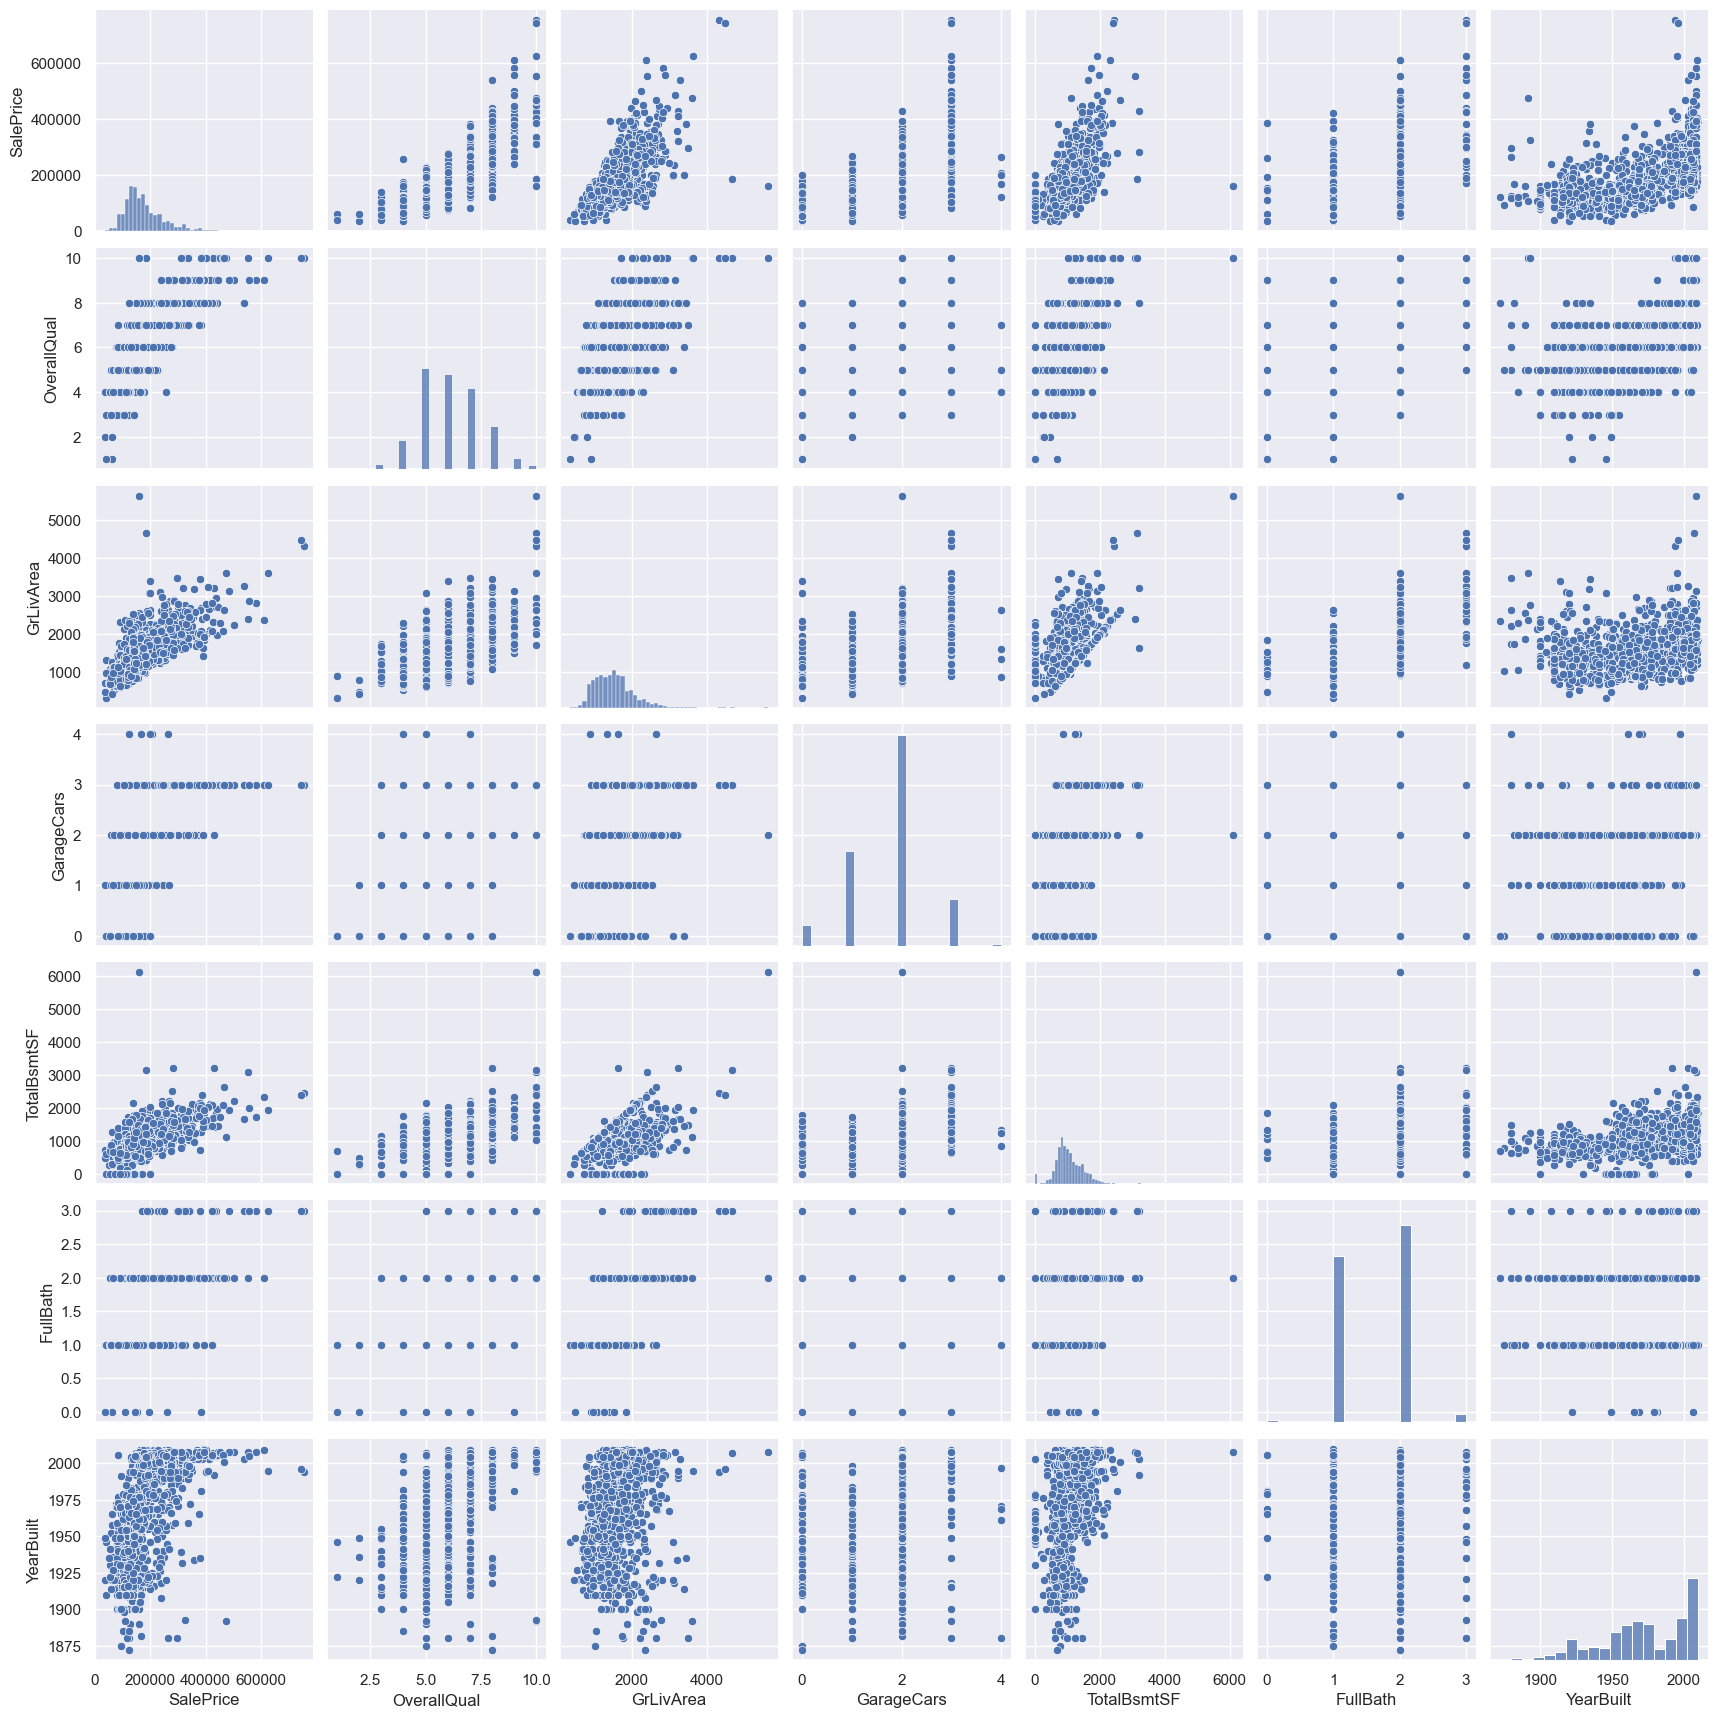

In [15]:
sns.pairplot(df_train[cols], height=2.5)
plt.show()

Y terminamos con plt.show();